<a href="https://colab.research.google.com/github/tjgustjr30723/linear-algebra2/blob/main/%EC%84%A0%EB%8C%80_2%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.optim as optim
x_train = torch.FloatTensor([[5],[7],[10],[15],[17],[20]])
y_train = torch.FloatTensor([[50],[61],[73],[91],[94],[99]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

hypothesis = x_train * W + b
cost = torch.mean((hypothesis - y_train)**2)
optimizer = optim.SGD([W, b], lr = 0.001)

epoch = 20000
for i in range(epoch):
    hypothesis = x_train * W + b

    cost = torch.mean((hypothesis - y_train)**2)

    optimizer.zero_grad()

    cost.backward()

    optimizer.step()

    if(i*1) % 2000 == 0:
        print("Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}".format(i+1,epoch,W.item(), b.item(), cost.item()))


Epoch    1/20000 W: 2.117, b: 0.156 Cost: 6411.333496
Epoch 2001/20000 W: 4.620, b: 17.901 Cost: 70.713486
Epoch 4001/20000 W: 3.993, b: 27.109 Cost: 26.650620
Epoch 6001/20000 W: 3.663, b: 31.955 Cost: 14.442105
Epoch 8001/20000 W: 3.490, b: 34.507 Cost: 11.059441
Epoch 10001/20000 W: 3.398, b: 35.850 Cost: 10.122194
Epoch 12001/20000 W: 3.350, b: 36.557 Cost: 9.862542
Epoch 14001/20000 W: 3.325, b: 36.929 Cost: 9.790572
Epoch 16001/20000 W: 3.311, b: 37.124 Cost: 9.770633
Epoch 18001/20000 W: 3.304, b: 37.228 Cost: 9.765107


In [ ]:
test_input = torch.FloatTensor([[13]])
result = test_input * W + b
print(result)

tensor([[80.1908]], grad_fn=<AddBackward0>)


In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
x_train = torch.FloatTensor([[5],[7],[10],[15],[17],[20]])
y_train = torch.FloatTensor([[0],[0],[0],[1],[1],[1]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = torch.optim.SGD([W, b], lr = 0.1)

epoch = 20000
for i in range(epoch):
    hypothesis = torch.sigmoid(x_train * W + b)

    cost = F.binary_cross_entropy(hypothesis, y_train)

    optimizer.zero_grad()

    cost.backward()

    optimizer.step()

    if(i*1) % 2000 == 0:
        print("Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}".format(i+1,epoch,W.item(), b.item(), cost.item()))


Epoch    1/20000 W: 0.250, b: 0.000 Cost: 0.693147
Epoch 2001/20000 W: 0.693, b: -8.314 Cost: 0.069111
Epoch 4001/20000 W: 0.874, b: -10.618 Cost: 0.041694
Epoch 6001/20000 W: 0.991, b: -12.108 Cost: 0.030407
Epoch 8001/20000 W: 1.080, b: -13.227 Cost: 0.024081
Epoch 10001/20000 W: 1.151, b: -14.127 Cost: 0.019993
Epoch 12001/20000 W: 1.211, b: -14.882 Cost: 0.017119
Epoch 14001/20000 W: 1.263, b: -15.533 Cost: 0.014981
Epoch 16001/20000 W: 1.308, b: -16.106 Cost: 0.013327
Epoch 18001/20000 W: 1.349, b: -16.618 Cost: 0.012007


In [ ]:
test_input = torch.FloatTensor([[15.5]])
result = torch.sigmoid(test_input * W + b)
print(result)

tensor([[0.9878]], grad_fn=<SigmoidBackward0>)


In [ ]:
threshold = 0.5
predict = result >= torch.FloatTensor([threshold])
print(predict)

tensor([[True]])


In [ ]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_Sers("./samples/MNIST_data/", one_hot=True)
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random
device = torch.device("cpu")
#for reproducibility
random.seed(777)
torch.manual_seed(777)
training_epochs = 15
batch_size = 100

mnist_train = dsets.MNIST(root='MNIST_Data/', train=True, transform=transforms.ToTensor(),download=True)
mnist_test = dsets.MNIST(root='MNIST_Data/', train=False, transform=transforms.ToTensor(),download=True)
data_loader = DataLoader(dataset= mnist_train, batch_size=batch_size,drop_last=True)

linear = nn.Linear(784,10, bias=True).to(device)

criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(),lr=0.1)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 50763560.32it/s]


Extracting MNIST_Data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_Data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1637654.88it/s]


Extracting MNIST_Data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_Data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13500032.98it/s]


Extracting MNIST_Data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_Data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4082839.43it/s]

Extracting MNIST_Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_Data/MNIST/raw



Accuracy: 0.10050000250339508
Label:  5
Prediction:  3


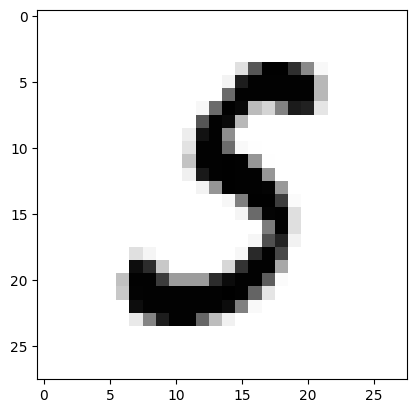

In [ ]:
with torch.no_grad():
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.targets[r:r+1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')

    plt.show()
